In [1]:
#Import the required modules
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

from astroML.resample import bootstrap
from astroML.stats import sigmaG, median_sigmaG

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

In [2]:
#Read the data from the csv file
data = pd.read_csv('arxiv.csv')

X = data['x']
y = data['y']
sigma_y = data['sigma_y']

In [3]:
#The best fit parameters of m and b are given by the optimize curve fit function based on chi square fitting
def func(x, b, m):
    return m*x+b

In [4]:
val = np.array([0, 0])#Assuming the values as (0,0)

#This function uses chisquare minimization
result = scipy.optimize.curve_fit(func, X, y, val, sigma_y)
b = result[0][0]
m = result[0][1]
print("The value of y-intercept is",b)
print("The value of slope is",m)

The value of y-intercept is 34.04773403259783
The value of slope is 2.2399207961186938


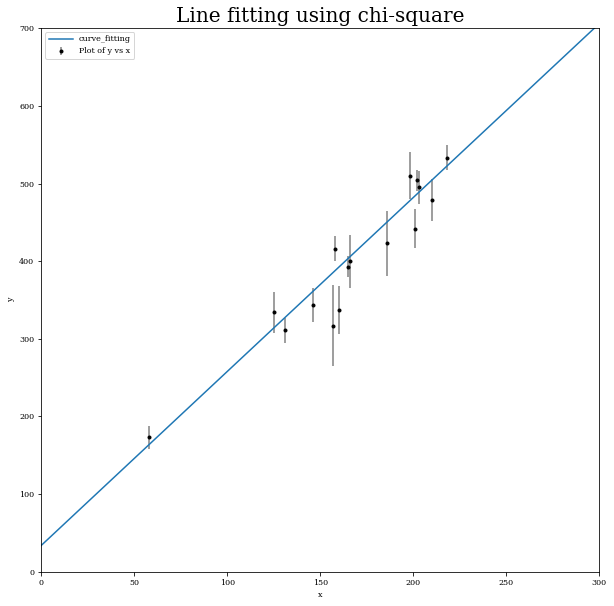

In [5]:
t = np.linspace(0, 300, 5000)
fig, ax = plt.subplots(figsize=(10,10))
ax.errorbar(X,y, sigma_y , fmt='.k', ecolor='gray', label='Plot of y vs x')
plt.title('Line fitting using chi-square', size=20)
plt.plot(t, b+m*t, label='curve_fitting')
plt.xlim(0, 300, 50)
plt.ylim(0, 700, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()